## How windy/explosive does it need to be to get a 250 micron grain to travel 700 km?

This workbook uses the method in the Stevenson et al (2015) Big grains go far... to estimate the size of plume, or the windspeed, that would be required to send a 250 micron basalt particle to a distance of 750 km.  It makes the wildly unrealistic assumption of the wind blowing at a constant velocity at all altitudes and in a straight line, but at least it gives a ball-park figure for what is possible.

See Section 3: Model constraints on cryptotephra transport

https://amt.copernicus.org/articles/8/2069/2015/amt-8-2069-2015.html

Assumptions:

- particle diameter: 250 microns
- basalt glass density: 2,800 kg/m3
- size-dependent density, using Bonadonna and Philips 2003 scheme
- grain sphericity of 0.7
- Ganser fall velocity model
- reasonable windspeed range: 10 - 60 m/s (Stratospheric winds can be fast)
- reasonable plume height: 10 - 30 km (This is well into Plinian)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb

from tephrange import particle

In [2]:
# Define calculation functions
def travel_distance(release_height, windspeed):
    p = particle.Particle(diameter=0.000050, sphericity=0.7, particle_density=2520)
    p.set_size_dependant_density(rho_glass=2800)
    return p.calculate_distance(release_height=release_height, windspeed=windspeed,
                                fall_step=100)

to_travel_distance_array = np.frompyfunc(travel_distance, 2, 1)

In [20]:
# Define input values and apply
release_heights = np.arange(1000, 31000, 5000)
windspeeds = np.arange(1, 62, 5)

heights_and_speeds = np.array(np.meshgrid(release_heights, windspeeds)).T
result = to_travel_distance_array.reduce(heights_and_speeds, axis=2)

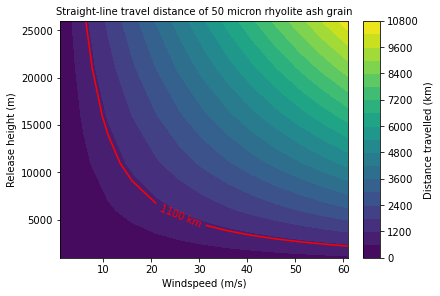

In [21]:
# Plot result
fig, ax = plt.subplots(constrained_layout=True)
contour_set = ax.contourf(windspeeds, release_heights, result, levels=20)
cbar = fig.colorbar(contour_set)
cbar_label = cbar.ax.set_ylabel('Distance travelled (km)')

# Add 750 km contour
c750 = ax.contour(windspeeds, release_heights, result, levels=(1100,), colors='r')
ax.clabel(c750, fmt="%d km")

# Label axes
xlabel = ax.set_xlabel('Windspeed (m/s)')
ylabel = ax.set_ylabel('Release height (m)')
title = ax.set_title("Straight-line travel distance of 50 micron rhyolite ash grain",
                     fontsize='medium')

#fig.savefig('250_micron_grain.png', dpi=300)

## Result

It is only possible to transport a basaltic grain to 250 km if the eruption is Plinian and the stratospheric winds are in the right direction.  Note that the travel distances are increasingly an over-estimate for higher windspeeds as they are less likely at lower altitudes.